# Question 9

Null Hypothesis (H₀): There is no significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease.

Alternative Hypothesis (H₁): There is a significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease.

Dataset Info:
<bound method DataFrame.info of      num   chol
0      0  233.0
1      2  286.0
2      1  229.0
3      0  250.0
4      0  204.0
..   ...    ...
915    1  333.0
916    0  139.0
917    2  223.0
918    0  385.0
919    1  254.0

[920 rows x 2 columns]>

Value counts for 'num':
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Missing values:
num      0
chol    30
dtype: int64

Group sizes:
Heart disease group size: 498
No heart disease group size: 392

t-statistic: -7.0615
p-value: 0.0000
Reject the null hypothesis. There is a significant difference in mean cholesterol levels between the two groups.


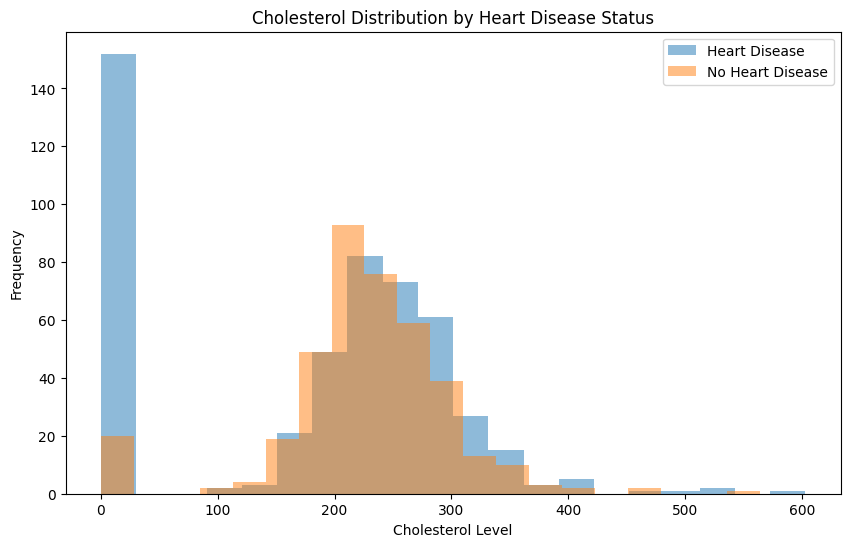

In [4]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('./heart_disease.csv')

print("Dataset Info:")
print(df[['num', 'chol']].info())
print("\nValue counts for 'num':")
print(df['num'].value_counts())

print("\nMissing values:")
print(df[['num', 'chol']].isnull().sum())

df_clean = df.dropna(subset=['num', 'chol'])

heart_disease_group = df_clean[df_clean['num'] > 0]['chol'].values
no_heart_disease_group = df_clean[df_clean['num'] == 0]['chol'].values

print("\nGroup sizes:")
print(f"Heart disease group size: {len(heart_disease_group)}")
print(f"No heart disease group size: {len(no_heart_disease_group)}")

if len(heart_disease_group) > 0 and len(no_heart_disease_group) > 0:
    t_stat, p_value = stats.ttest_ind(heart_disease_group, no_heart_disease_group)
    
    print(f"\nt-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in mean cholesterol levels between the two groups.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in mean cholesterol levels between the two groups.")
else:
    print("\nError: One or both groups are empty. Please check your data classification.")

plt.figure(figsize=(10, 6))
plt.hist(heart_disease_group, bins=20, alpha=0.5, label='Heart Disease')
plt.hist(no_heart_disease_group, bins=20, alpha=0.5, label='No Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()
